In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [76]:
#reading ABT 
adf = pd.read_csv('abt.csv')
hotel = adf

In [77]:
#displaying which features are in the ABT
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119209
Data columns (total 10 columns):
lead_time                    119210 non-null float64
days_in_waiting_list         119210 non-null float64
total_of_special_requests    119210 non-null float64
adr                          119210 non-null float64
agent                        119210 non-null float64
stays_in_week_nights         119210 non-null float64
previous_cancellations       119210 non-null float64
arrival_date_day_of_month    119210 non-null float64
arrival_date_week_number     119210 non-null float64
is_canceled                  119210 non-null float64
dtypes: float64(10)
memory usage: 10.0 MB


In [78]:
hotel.head()

,lead_time,days_in_waiting_list,total_of_special_requests,adr,agent,stays_in_week_nights,previous_cancellations,arrival_date_day_of_month,arrival_date_week_number,is_canceled
0,0.464043,0.0,0.0,0.001180,0.000000,0.00,0.0,0.0,0.5,0.0
1,1.000000,0.0,0.0,0.001180,0.000000,0.00,0.0,0.0,0.5,0.0
2,0.009498,0.0,0.0,0.015053,0.000000,0.02,0.0,0.0,0.5,0.0
3,0.017639,0.0,0.0,0.015053,0.568224,0.02,0.0,0.0,0.5,0.0
4,0.018996,0.0,0.2,0.019307,0.448598,0.04,0.0,0.0,0.5,0.0


In [101]:
hotel.describe()

,lead_time,days_in_waiting_list,total_of_special_requests,adr,agent,stays_in_week_nights,previous_cancellations,arrival_date_day_of_month,arrival_date_week_number,is_canceled
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.141261,0.005937,0.114301,0.020041,0.139980,0.049984,0.003353,0.493291,0.503142,0.370766
std,0.145014,0.045008,0.158575,0.009329,0.200316,0.037942,0.032497,0.292702,0.261560,0.483012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024423,0.000000,0.000000,0.014035,0.013084,0.020000,0.000000,0.233333,0.288462,0.000000
50%,0.093623,0.000000,0.000000,0.018743,0.016822,0.040000,0.000000,0.500000,0.519231,0.000000
75%,0.218453,0.000000,0.200000,0.024486,0.284112,0.060000,0.000000,0.733333,0.711538,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\tvrju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\tvrju\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


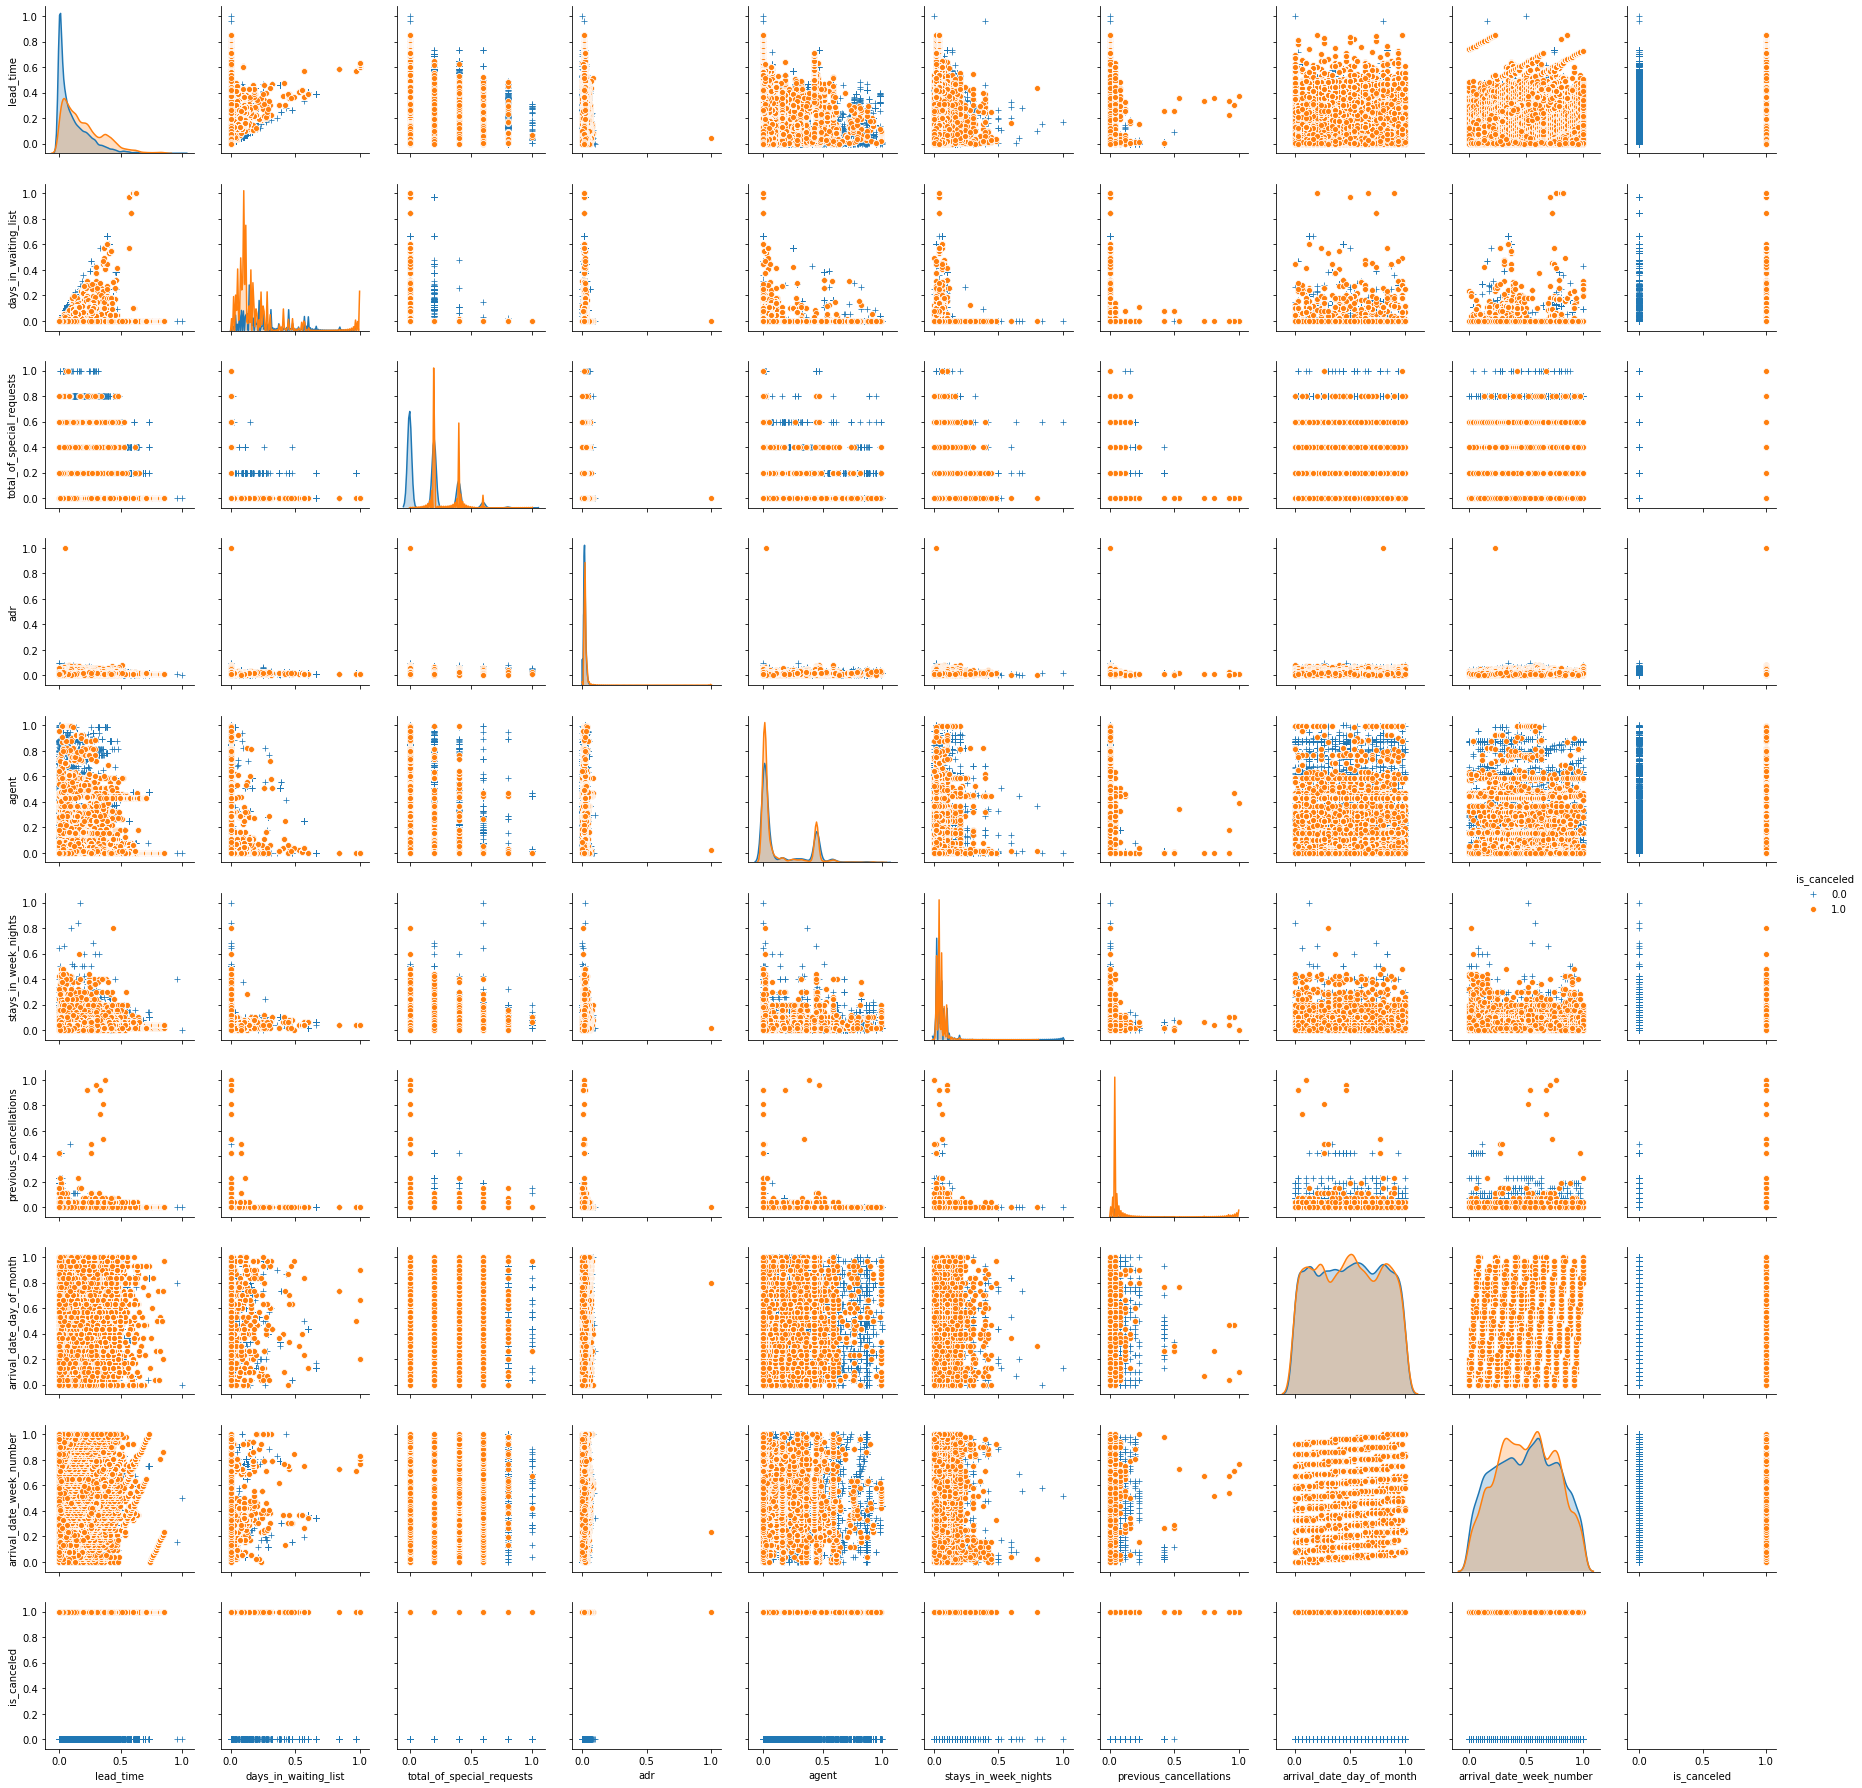

In [28]:
#scatterplot matrix
hotel_scatter = hotel
hotel_concise = hotel_scatter[['lead_time', 'days_in_waiting_list','total_of_special_requests', 'adr','agent','stays_in_week_nights','previous_cancellations','arrival_date_day_of_month','arrival_date_week_number','is_canceled']]

sns.pairplot(hotel_concise, hue = 'is_canceled', markers=['+','o'])


In [79]:
#testing/training split
from sklearn.model_selection import train_test_split

df = hotel
X = df[['lead_time','days_in_waiting_list','total_of_special_requests','adr','agent','stays_in_week_nights','previous_cancellations','arrival_date_day_of_month',
        'arrival_date_week_number']].values
y = df['is_canceled'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [80]:
df1 = pd.DataFrame(data=X_train)
print(df1.head())
print(df1.shape)
df2 = pd.DataFrame(data=y_test)
print(df2.head())
print(df2.shape)

          0    1    2         3         4     5    6         7         8
0  0.050204  0.0  0.0  0.021526  0.706542  0.04  0.0  0.466667  0.192308
1  0.092266  0.0  0.0  0.014868  0.000000  0.04  0.0  0.466667  0.192308
2  0.248304  0.0  0.0  0.011261  0.557009  0.02  0.0  0.500000  0.288462
3  0.000000  0.0  0.0  0.001180  0.000000  0.02  0.0  0.200000  0.096154
4  0.111262  0.0  0.4  0.001180  0.448598  0.00  0.0  0.033333  0.923077
(79870, 9)
     0
0  1.0
1  0.0
2  0.0
3  0.0
4  1.0
(39340, 1)


In [81]:
#building the decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=9, random_state=0)
dt = dt.fit(X_train, y_train)
print(dt)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


In [82]:
#exporting the tree
from sklearn.tree.export import export_text

r = export_text(dt, feature_names = ['lead_time','days_in_waiting_list','total_of_special_requests','adr','agent','stays_in_week_nights','previous_cancellations','arrival_date_day_of_month','arrival_date_week_number'])
print(r)

|--- lead_time <= 0.02
|   |--- lead_time <= 0.01
|   |   |--- total_of_special_requests <= 0.10
|   |   |   |--- lead_time <= 0.00
|   |   |   |   |--- arrival_date_week_number <= 0.32
|   |   |   |   |   |--- adr <= 0.00
|   |   |   |   |   |   |--- adr <= 0.00
|   |   |   |   |   |   |   |--- arrival_date_day_of_month <= 0.38
|   |   |   |   |   |   |   |   |--- arrival_date_week_number <= 0.13
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- arrival_date_week_number >  0.13
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- arrival_date_day_of_month >  0.38
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- adr >  0.00
|   |   |   |   |   |   |   |--- arrival_date_day_of_month <= 0.12
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- arrival_date_day_of_month >  0.12
|   |   |   |   |   |   |   |   |--- arrival_date_week_number <= 0.28
|   |   |   |   |

In [83]:
#predictions, testing, and scoring the classifier
print(len(X_test))
X_test[0]

39340


array([0.13161465, 0.        , 0.        , 0.02707542, 0.05420561,
       0.06      , 0.        , 0.13333333, 0.76923077])

In [84]:
#Using the DT classifier
dt.predict(X_test)

array([1., 0., 1., ..., 0., 0., 0.])

In [105]:
#Getting the testing and training score 
score = dt.score(X_test, y_test)
print('Testing score: ', score)
score = dt.score(X_train, y_train)
print('Training score ', score)

Testing score:  0.7632689374682258
Training score  0.7684988105671716


In [85]:
#getting the training and testing scores for entropy
resultsEntropy = pd.DataFrame(columns = ['LevelLimit', 'Score for Training', 'Score for Testing'])
for treeDepth in range (1, 11):
    dt_j = DecisionTreeClassifier(criterion='entropy', max_depth = treeDepth, random_state=0)
    dt_j = dt_j.fit(X_train, y_train)
    dt_j.predict(X_test)
    scoreTrain = dt_j.score(X_train, y_train)
    scoreTest = dt_j.score(X_test, y_test)
    resultsEntropy.loc[treeDepth] = [treeDepth, scoreTrain, scoreTest]

print(resultsEntropy)

    LevelLimit  Score for Training  Score for Testing
1          1.0            0.630612           0.626436
2          2.0            0.694541           0.695323
3          3.0            0.695680           0.696594
4          4.0            0.722900           0.721251
5          5.0            0.738488           0.737265
6          6.0            0.742832           0.741052
7          7.0            0.747865           0.746568
8          8.0            0.757731           0.754830
9          9.0            0.768499           0.763269
10        10.0            0.779629           0.771403


[Text(0, 0.5, 'Classification Accuracy'), Text(0.5, 0, 'Tree Depth')]

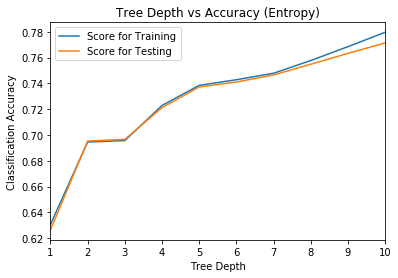

In [47]:
#visualizing the score for entropy
ax = resultsEntropy.plot.line(x='LevelLimit', y=['Score for Training', 'Score for Testing'], title='Tree Depth vs Accuracy (Entropy)')
ax.set(xlabel="Tree Depth", ylabel="Classification Accuracy")

In [86]:
#getting the training and testing scores for gini index
resultsGini = pd.DataFrame(columns = ['LevelLimit', 'Score for Training', 'Score for Testing'])
for treeDepth in range (1, 11):
    dt_j = DecisionTreeClassifier(criterion='gini', max_depth = treeDepth, random_state=0)
    dt_j = dt_j.fit(X_train, y_train)
    dt_j.predict(X_test)
    scoreTrain = dt_j.score(X_train, y_train)
    scoreTest = dt_j.score(X_test, y_test)
    resultsGini.loc[treeDepth] = [treeDepth, scoreTrain, scoreTest]

print(resultsGini)

    LevelLimit  Score for Training  Score for Testing
1          1.0            0.675886           0.671810
2          2.0            0.677664           0.673742
3          3.0            0.699649           0.700280
4          4.0            0.723488           0.722166
5          5.0            0.742544           0.740798
6          6.0            0.744310           0.742425
7          7.0            0.750081           0.747026
8          8.0            0.763591           0.759710
9          9.0            0.771353           0.764692
10        10.0            0.784212           0.771708


[Text(0, 0.5, 'Classification Accuracy'), Text(0.5, 0, 'Tree Depth')]

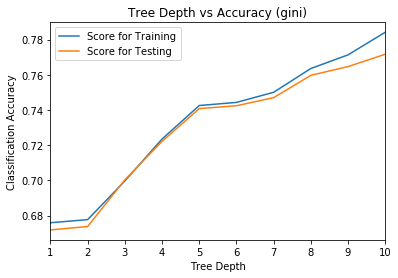

In [87]:
#visulaizing the scores for Gini
ax = resultsGini.plot.line(x='LevelLimit', y=['Score for Training', 'Score for Testing'], title='Tree Depth vs Accuracy (gini)')
ax.set(xlabel="Tree Depth", ylabel="Classification Accuracy")

In [52]:
#testing/training split again for different model
df = hotel
X = df[['lead_time','days_in_waiting_list','total_of_special_requests','adr','agent','stays_in_week_nights','previous_cancellations','arrival_date_day_of_month',
        'arrival_date_week_number']].values
y = df['is_canceled'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [102]:
#building logistic regression model
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


C:\Users\tvrju\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
#making predictions using the LR model
y_pred = log_reg.predict(X_test)

In [104]:
#confusion matrix
cf = confusion_matrix(y_test, y_pred)
print('\n', cf)
#According to the confusion matrix: we have 21,818 TP and 2,826 FP
#8,904 FN and 5,792 TN


 [[21818  2826]
 [ 8904  5792]]


<function matplotlib.pyplot.show(*args, **kw)>

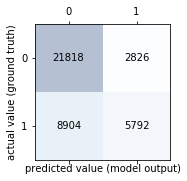

In [90]:
#Here is the confusion matrix in a plot 
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf.shape[0]):
    for j in range(cf.shape[1]):
        ax.text(x=j, y=i, s=cf[i,j], va='center', ha='center')
plt.xlabel('predicted value (model output)')
plt.ylabel('actual value (ground truth)')
plt.show

In [91]:
#getting the classification error(missclassification rate)
from sklearn import metrics
print('Missclassification error:', (1 - metrics.accuracy_score(y_test, y_pred)))

#Classification accuracy 
print('Classification accuracy: ',metrics.accuracy_score(y_test, y_pred))

Missclassification error: 0.2981698017285206
Classification accuracy:  0.7018301982714794


In [100]:
#building random forest classifer
df = hotel

from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[:9]
X = df[feat_labels]
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
print("Training accuracy:", forest.score(X_train, y_train))
print("Testing accuracy:", forest.score(X_test, y_test))

importances = forest.feature_importances_
for f in range(X_train.shape[1]):
    print('Feature: ', feat_labels[f], '\tImportance: ', importances[f])

Training accuracy: 0.9889946162514085
Testing accuracy: 0.8543721403152008
Feature:  lead_time 	Importance:  0.2518017432074677
Feature:  days_in_waiting_list 	Importance:  0.008157936736087917
Feature:  total_of_special_requests 	Importance:  0.07746127873070682
Feature:  adr 	Importance:  0.1885909119042572
Feature:  agent 	Importance:  0.11704120997646894
Feature:  stays_in_week_nights 	Importance:  0.06493244314651926
Feature:  previous_cancellations 	Importance:  0.0598489714616067
Feature:  arrival_date_day_of_month 	Importance:  0.11407813601066806
Feature:  arrival_date_week_number 	Importance:  0.1180873688262175
